Практична робота №7

Баш Анастасія
МІТ-31

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.callbacks import LearningRateScheduler

Завдання №1
Створення власного набору даних для класифікації:

Бінарна класифікація: Створіть набір даних, де кожен запис представляє два числові атрибути та бінарний класовий лейбл (наприклад, "0" або "1"). Ці дані можуть бути синтетичними та містити, наприклад, оцінки студентів та їхній успіх (пройшов/не пройшов).

In [3]:
# Генеруємо синтетичний набір даних для бінарної класифікації
np.random.seed(42)
X_bin = np.random.rand(100, 2)
y_bin = np.random.randint(2, size=100)

# Розділяємо дані на тренувальний та тестовий набори
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

# Стандартизація даних
scaler_bin = StandardScaler()
X_bin_train_scaled = scaler_bin.fit_transform(X_bin_train)
X_bin_test_scaled = scaler_bin.transform(X_bin_test)

2. Мультикласова класифікація: Розширте набір даних для включення більше ніж двох класів (наприклад, "низький", "середній", "високий").

In [4]:
# Генеруємо синтетичний набір даних для мультикласової класифікації
X_multi = np.random.rand(150, 2)
y_multi = np.random.randint(3, size=150)

# Розділяємо дані на тренувальний та тестовий набори
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Стандартизація даних
scaler_multi = StandardScaler()
X_multi_train_scaled = scaler_multi.fit_transform(X_multi_train)
X_multi_test_scaled = scaler_multi.transform(X_multi_test)


Завдання №2
Побудова нейронної мережі для класифікації:

1. Розробіть нейронну мережу з трьома повнозв'язними шарами для класифікації. Використовуйте відповідні функції активації (наприклад, ReLU для прихованих шарів та sigmoid для виходу в бінарній класифікації або softmax для мультикласової).

In [7]:
# Побудова та навчання базової моделі для бінарної класифікації
model_bin = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bin = model_bin.fit(X_bin_train_scaled, y_bin_train, epochs=50, validation_data=(X_bin_test_scaled, y_bin_test))

# Оцінка моделі для бінарної класифікації
y_bin_pred = (model_bin.predict(X_bin_test_scaled) > 0.5).astype(int)
accuracy_bin = accuracy_score(y_bin_test, y_bin_pred)
print(f'Accuracy for Binary Classification: {accuracy_bin}')

Epoch 1/50
3/3 [==============================] - 0s 56ms/step - loss: 0.6943 - accuracy: 0.5125 - val_loss: 0.6622 - val_accuracy: 0.7000
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.6912 - accuracy: 0.5250 - val_loss: 0.6648 - val_accuracy: 0.6500
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 0.6892 - accuracy: 0.5375 - val_loss: 0.6672 - val_accuracy: 0.7000
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 0.6875 - accuracy: 0.5500 - val_loss: 0.6705 - val_accuracy: 0.6500
Epoch 5/50
3/3 [==============================] - 0s 6ms/step - loss: 0.6866 - accuracy: 0.5375 - val_loss: 0.6726 - val_accuracy: 0.6500
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.6854 - accuracy: 0.5375 - val_loss: 0.6731 - val_accuracy: 0.6500
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 0.6842 - accuracy: 0.5625 - val_loss: 0.6720 - val_accuracy: 0.7000
Epoch 8/50
3/3 [=================

In [8]:
# Побудова та навчання базової моделі для мультикласової класифікації
model_multi = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Кількість класів у вихідному шарі
])

model_multi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_multi = model_multi.fit(X_multi_train_scaled, y_multi_train, epochs=50, validation_data=(X_multi_test_scaled, y_multi_test))

# Оцінка моделі для мультикласової класифікації
y_multi_pred = np.argmax(model_multi.predict(X_multi_test_scaled), axis=1)
accuracy_multi = accuracy_score(y_multi_test, y_multi_pred)
print(f'Accuracy for Multiclass Classification: {accuracy_multi}')

Epoch 1/50
4/4 [==============================] - 0s 42ms/step - loss: 1.1060 - accuracy: 0.3333 - val_loss: 1.1272 - val_accuracy: 0.2667
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0930 - accuracy: 0.3583 - val_loss: 1.1341 - val_accuracy: 0.2000
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0817 - accuracy: 0.4083 - val_loss: 1.1378 - val_accuracy: 0.2333
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0733 - accuracy: 0.4583 - val_loss: 1.1443 - val_accuracy: 0.2667
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0681 - accuracy: 0.4500 - val_loss: 1.1498 - val_accuracy: 0.2667
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0634 - accuracy: 0.4417 - val_loss: 1.1579 - val_accuracy: 0.2667
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0609 - accuracy: 0.4667 - val_loss: 1.1655 - val_accuracy: 0.2667
Epoch 8/50
4/4 [=================

2. Навчіть модель на вашому власному наборі даних для класифікації (50 епох) та оцініть її ефективність.

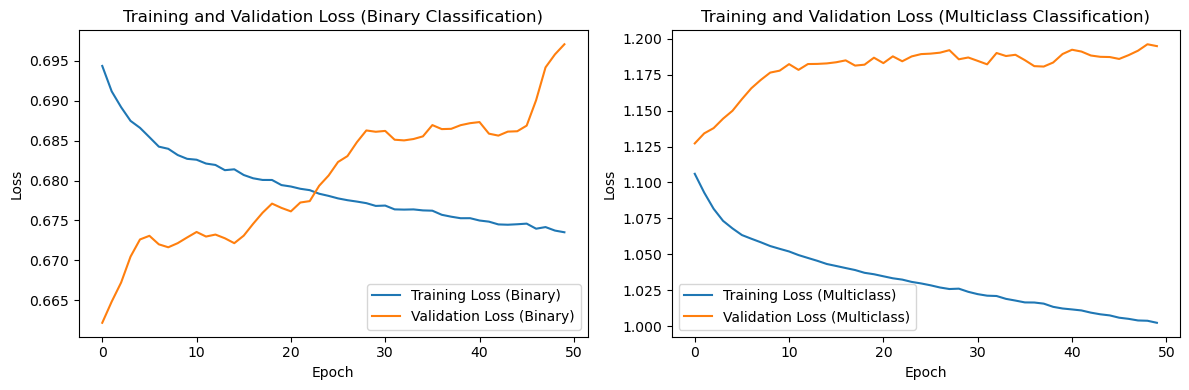

In [9]:
# Візуалізація зміни функції втрат та точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_bin.history['loss'], label='Training Loss (Binary)')
plt.plot(history_bin.history['val_loss'], label='Validation Loss (Binary)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Binary Classification)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_multi.history['loss'], label='Training Loss (Multiclass)')
plt.plot(history_multi.history['val_loss'], label='Validation Loss (Multiclass)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Multiclass Classification)')
plt.legend()

plt.tight_layout()
plt.show()

Завдання №3
Експерименти з покращенням результатів:

Спробуйте побудувати більшу модель, додавши четвертий повнозв'язний шар. Збільште кількість нейронів у кожному шарі. Використовуйте оптимізатор Adam та експериментуйте із зміною його першого параметра (швидкість навчання) з використанням callback. Протестуйте, як змінюється продуктивність моделі при тренуванні протягом 300 епох.

In [13]:
# Побудова та навчання моделі для бінарної класифікації
def build_model_bin():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

model_bin = build_model_bin()

# Оптимізатор Adam з callback для зміни швидкості навчання
def lr_schedule(epoch, lr):
    if epoch < 100:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_callback = LearningRateScheduler(lr_schedule)

model_bin.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_bin = model_bin.fit(X_bin_train_scaled, y_bin_train, epochs=300,
                            validation_data=(X_bin_test_scaled, y_bin_test),
                            callbacks=[lr_callback], verbose=0)

In [14]:
# Побудова та навчання моделі для мультикласової класифікації
def build_model_multi():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    return model

model_multi = build_model_multi()

model_multi.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_multi = model_multi.fit(X_multi_train_scaled, y_multi_train, epochs=300,
                                validation_data=(X_multi_test_scaled, y_multi_test),
                                callbacks=[lr_callback], verbose=0)


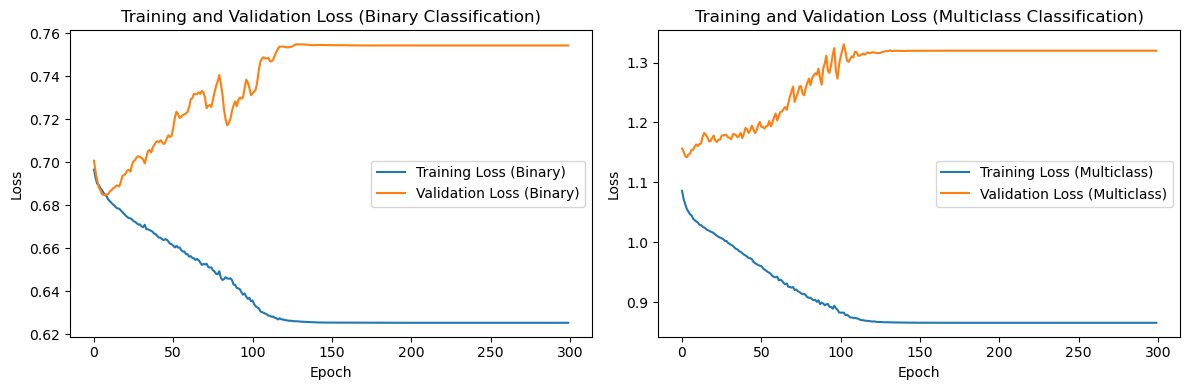

In [15]:
# Візуалізація зміни функції втрат та точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_bin.history['loss'], label='Training Loss (Binary)')
plt.plot(history_bin.history['val_loss'], label='Validation Loss (Binary)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Binary Classification)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_multi.history['loss'], label='Training Loss (Multiclass)')
plt.plot(history_multi.history['val_loss'], label='Validation Loss (Multiclass)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Multiclass Classification)')
plt.legend()

plt.tight_layout()
plt.show()